In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as ss
from fredapi import Fred
import datetime as dt

In [2]:
sns.set_style('whitegrid')
plt.style.use('seaborn')

In [3]:
API_KEY = 'f86418262f498dd5f101ad0224865763'

In [4]:
fred = Fred(api_key = API_KEY)

In [5]:
brent = fred.get_series('POILBREUSDM').pct_change().to_frame().reset_index().rename(columns = {0:'Brent'})
wti = fred.get_series('POILWTIUSDM').pct_change().to_frame().reset_index().rename(columns = {0:'WTI'})
coal = fred.get_series('PCOALAUUSDM').pct_change().to_frame().reset_index().rename(columns = {0:'Coal'})
nat_gas = fred.get_series('DHHNGSP').pct_change().to_frame().reset_index().rename(columns = {0:'Natural gas'})
lng = fred.get_series('PNGASJPUSDM').pct_change().to_frame().reset_index().rename(columns = {0:'LNG'})
gdp = fred.get_series('GDP').pct_change().to_frame().reset_index().rename(columns = {0:'GDP'})

In [6]:
dfs = [brent,wti,coal,nat_gas,lng]
for x in dfs:
    gdp = gdp.merge(x,on = 'index')
data = gdp
data[['GDP','Brent','WTI','Coal','Natural gas','LNG']] = data[['GDP','Brent','WTI','Coal','Natural gas','LNG']] * 100

In [7]:
recessions = fred.get_series('JHDUSRGDPBR').to_frame().reset_index().rename(columns = {0:'isRecession'})
recs = recessions.loc[recessions["isRecession"] == 1, 'index']

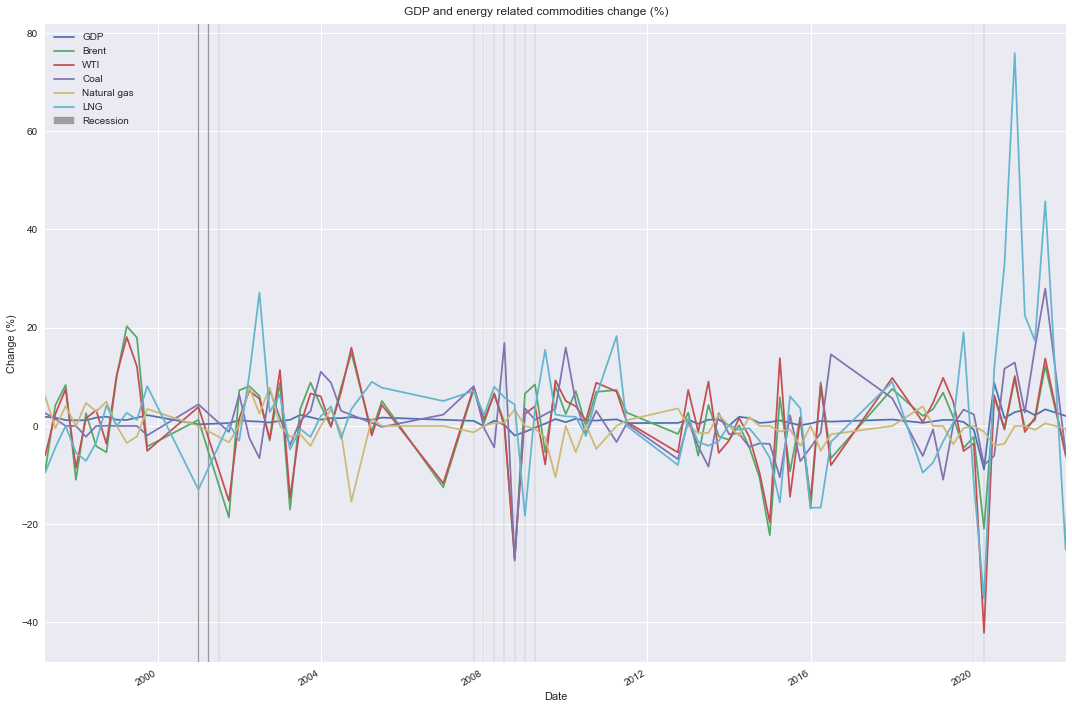

In [8]:
fig,ax = plt.subplots()
data.plot.line(ax = ax, figsize=(15, 10), x='index')
for day in recs:
    plt.axvspan(day, day + dt.timedelta(days=1), color="grey", alpha=0.7)
plt.xlim('1997-04-01','2022-04-01')
plt.suptitle('GDP and energy related commodities change (%)')
ax.set(xlabel='Date', ylabel='Change (%)')
ax.legend(['GDP','Brent','WTI','Coal','Natural gas','LNG','Recession'])
plt.tight_layout()

In [9]:
unrate = fred.get_series('UNRATE')

In [10]:
data = unrate.tolist()

In [11]:
loc,scale = ss.norm.fit(data)
pdf = ss.norm.pdf(data, loc = loc,scale = scale)
cdf = ss.norm.cdf(data, loc = loc,scale = scale)

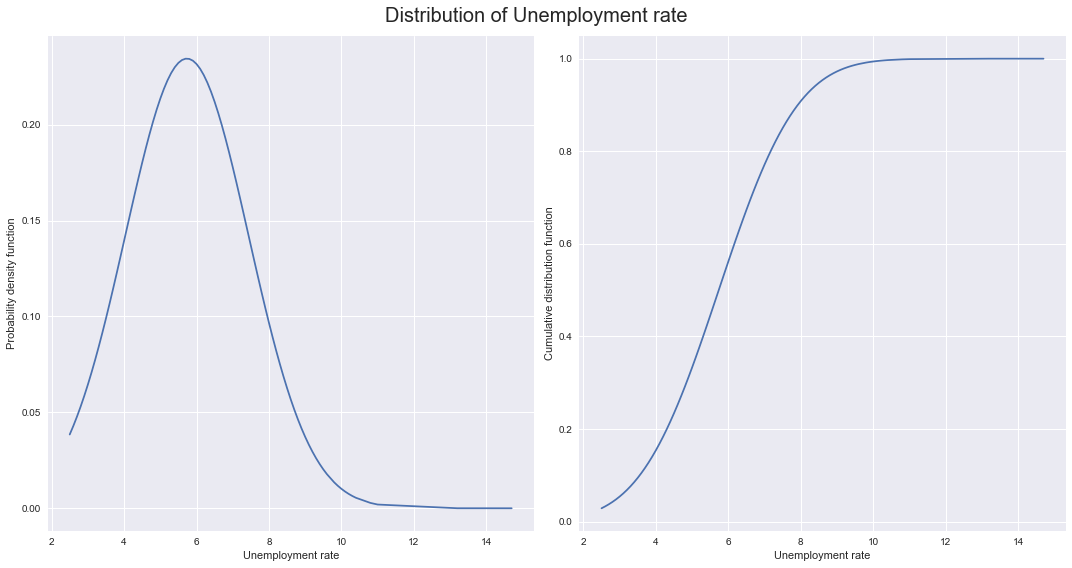

In [12]:
fig,axs = plt.subplots(ncols = 2, figsize=(15, 8))
fig.suptitle("Distribution of Unemployment rate", fontsize=20)
sns.lineplot(x = data,y = pdf,ax = axs[0]).set(xlabel = "Unemployment rate", ylabel = "Probability density function")
sns.lineplot(x = data,y = cdf,ax = axs[1]).set( xlabel = "Unemployment rate", ylabel = "Cumulative distribution function")
fig.tight_layout()

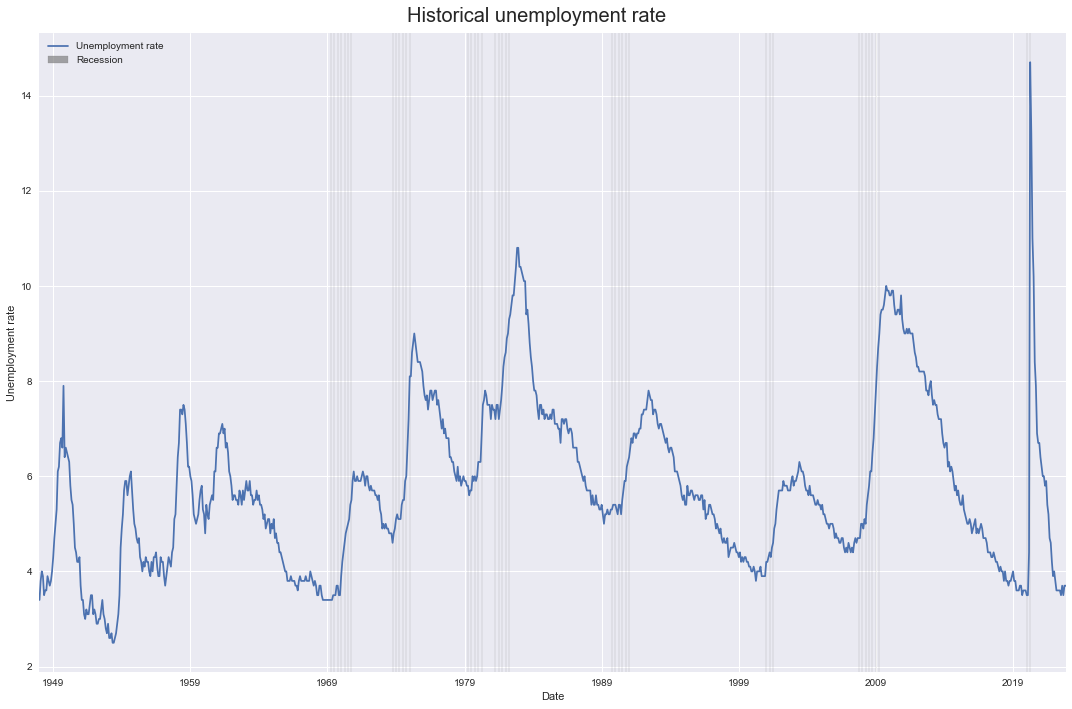

In [13]:
fig,ax = plt.subplots()
unrate.plot.line(ax = ax, figsize=(15, 10), x ='index', y ='unrate')
for day in recs:
    plt.axvspan(day, day + dt.timedelta(days=1), color="grey", alpha=0.7)
ax.set(xlabel='Date', ylabel='Unemployment rate')
ax.legend(['Unemployment rate','Recession'])
fig.suptitle('Historical unemployment rate', fontsize=20)
plt.tight_layout()

In [14]:
unrate_change = unrate.pct_change().to_frame().dropna().reset_index().rename(columns = {0:'% change'})
unrate = unrate.to_frame().reset_index().rename(columns = {0:'unrate'})
unrate = unrate.merge(unrate_change, on = 'index')
unrate.dropna(inplace = True)

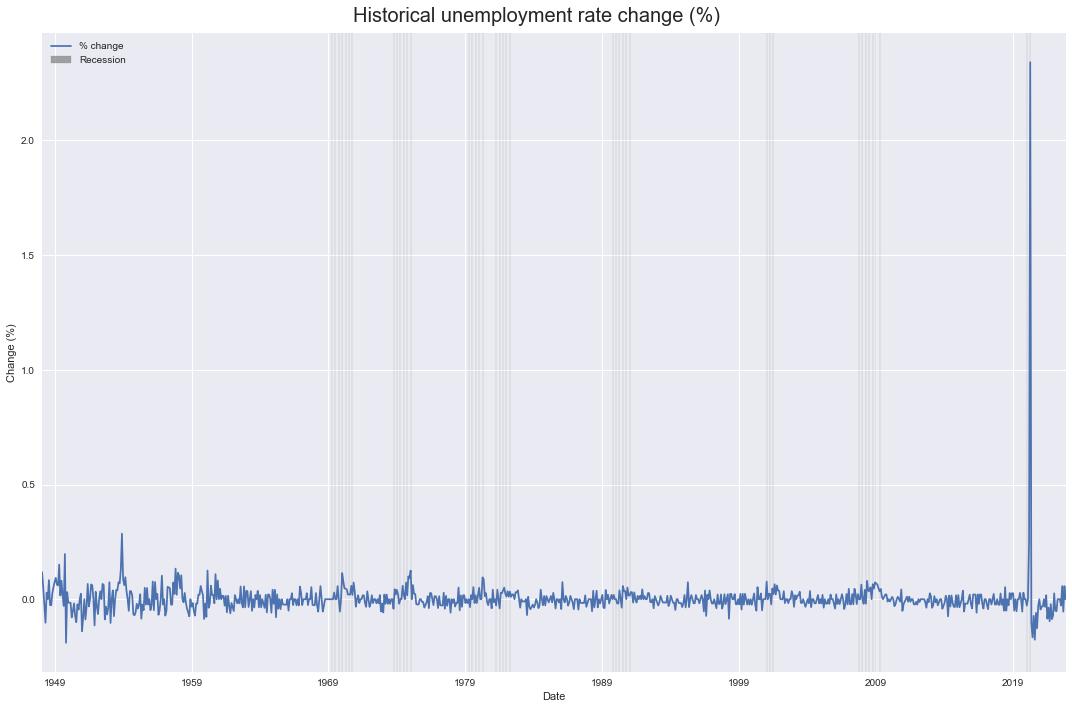

In [15]:
fig,ax = plt.subplots()
unrate.plot.line(ax = ax, figsize=(15, 10), x ='index', y ='% change')
for day in recs:
    plt.axvspan(day, day + dt.timedelta(days=1), color="grey", alpha=0.7)
ax.set(xlabel='Date', ylabel='Change (%)')
ax.legend(['% change','Recession'])
fig.suptitle('Historical unemployment rate change (%)', fontsize=20)
plt.tight_layout()

In [16]:
fed_funds = fred.get_series('DFF')

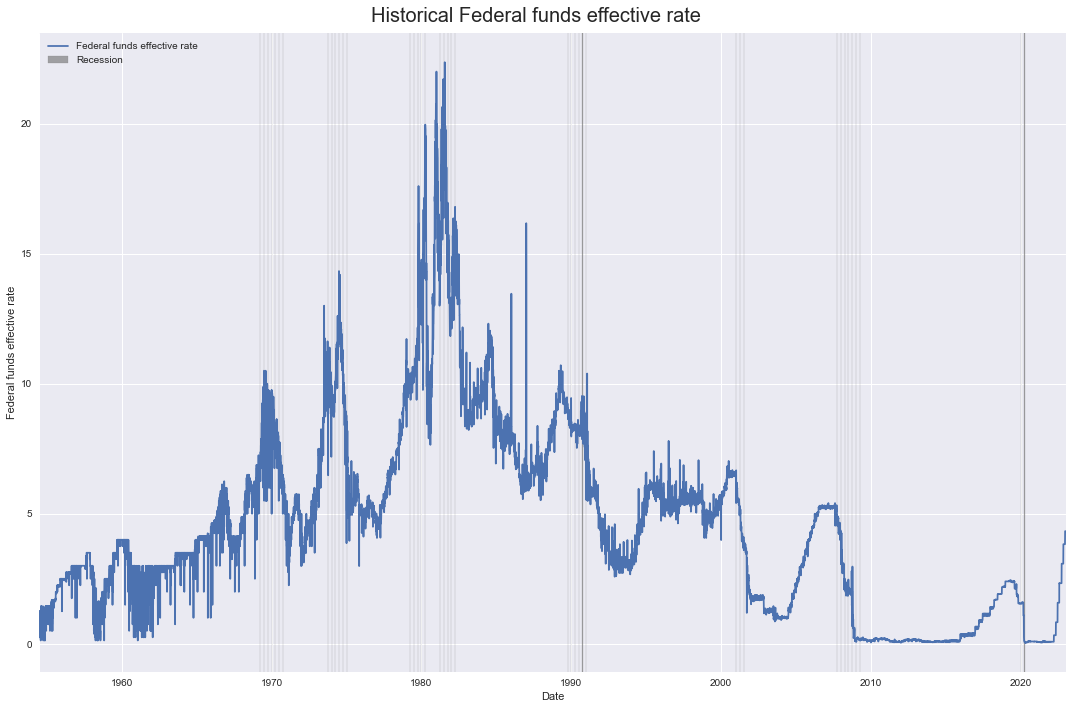

In [17]:
fig,ax = plt.subplots()
fed_funds.plot.line(ax = ax, figsize=(15, 10), x ='index', y ='fed_funds_rate')
for day in recs:
    plt.axvspan(day, day + dt.timedelta(days=1), color="grey", alpha=0.7)
ax.set(xlabel='Date', ylabel='Federal funds effective rate')
ax.legend(['Federal funds effective rate','Recession'])
fig.suptitle('Historical Federal funds effective rate', fontsize=20)
plt.tight_layout()

In [18]:
fed_funds_change = fed_funds.pct_change().to_frame().reset_index().dropna().rename(columns = {0:'% change'})
fed_funds = fed_funds.to_frame().reset_index().rename(columns = {0:'fed_funds_rate'})
fed_funds = fed_funds.merge(fed_funds_change, on = 'index')
fed_funds.dropna(inplace = True)

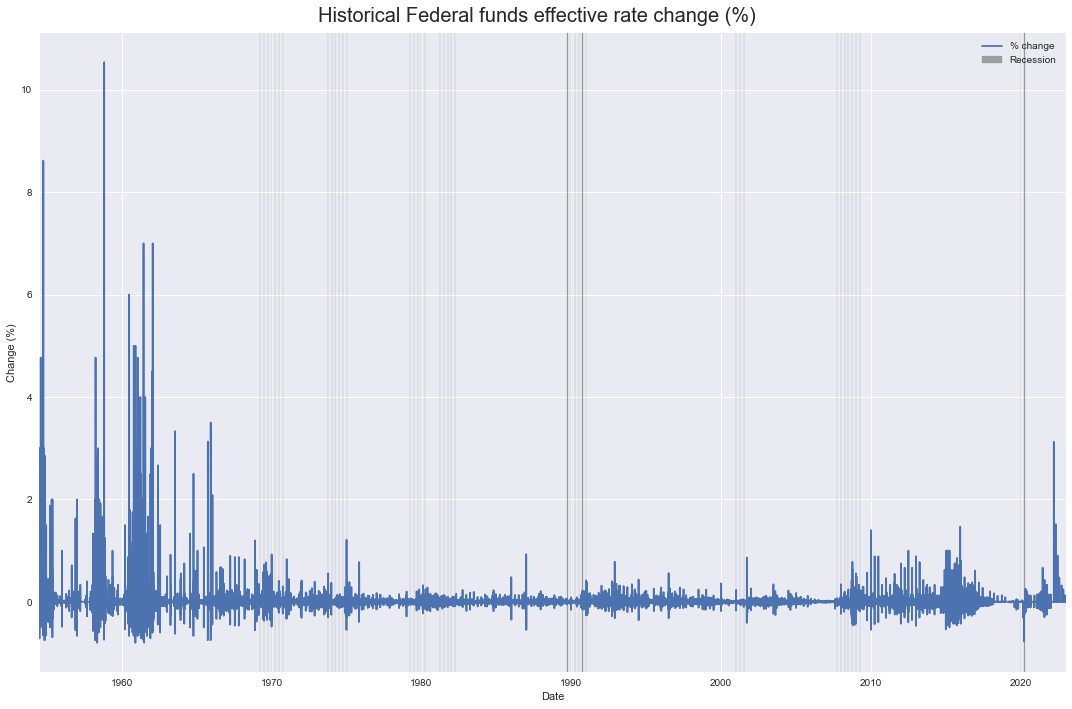

In [19]:
fig,ax = plt.subplots()
fed_funds.plot.line(ax = ax, figsize=(15, 10), x ='index', y ='% change')
for day in recs:
    plt.axvspan(day, day + dt.timedelta(days=1), color="grey", alpha=0.7)
ax.set(xlabel='Date', ylabel='Change (%)')
ax.legend(['% change','Recession'])
fig.suptitle('Historical Federal funds effective rate change (%)', fontsize=20)
plt.tight_layout()

In [20]:
merged = unrate.merge(fed_funds, on = 'index')
merged.rename(columns = {'% change_x':'unrate_change','% change_y':'fed_funds_change'},inplace = True)

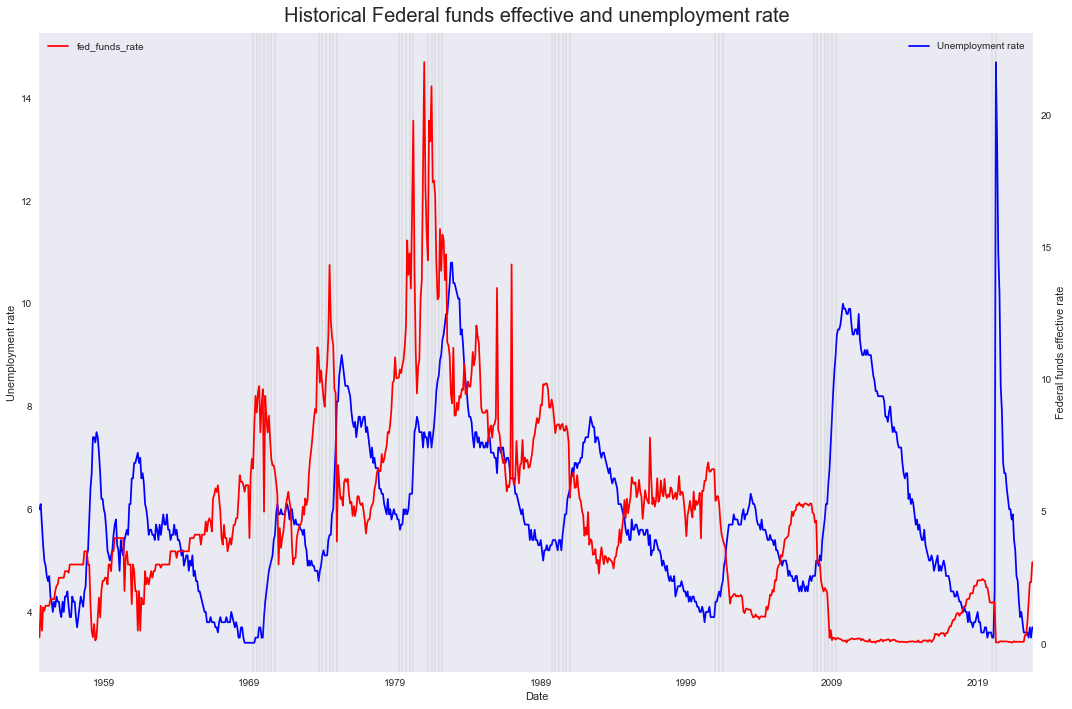

In [21]:
fig, ax = plt.subplots()
ax2 = plt.twinx()
merged.plot.line(ax = ax, figsize=(15, 10), x = 'index',y = 'unrate', color = 'b')
merged.plot.line(ax = ax2, figsize=(15, 10), x = 'index',y = 'fed_funds_rate', color = 'r')
for day in recs:
    plt.axvspan(day, day + dt.timedelta(days=1), color="grey", alpha=0.7)
ax.set(xlabel='Date', ylabel='Unemployment rate')
ax2.set(ylabel='Federal funds effective rate')
ax.grid(None)
ax2.grid(None)
ax.legend(['Unemployment rate','Federal funds effective rate','Recession'])
fig.suptitle('Historical Federal funds effective and unemployment rate', fontsize=20)
plt.tight_layout()

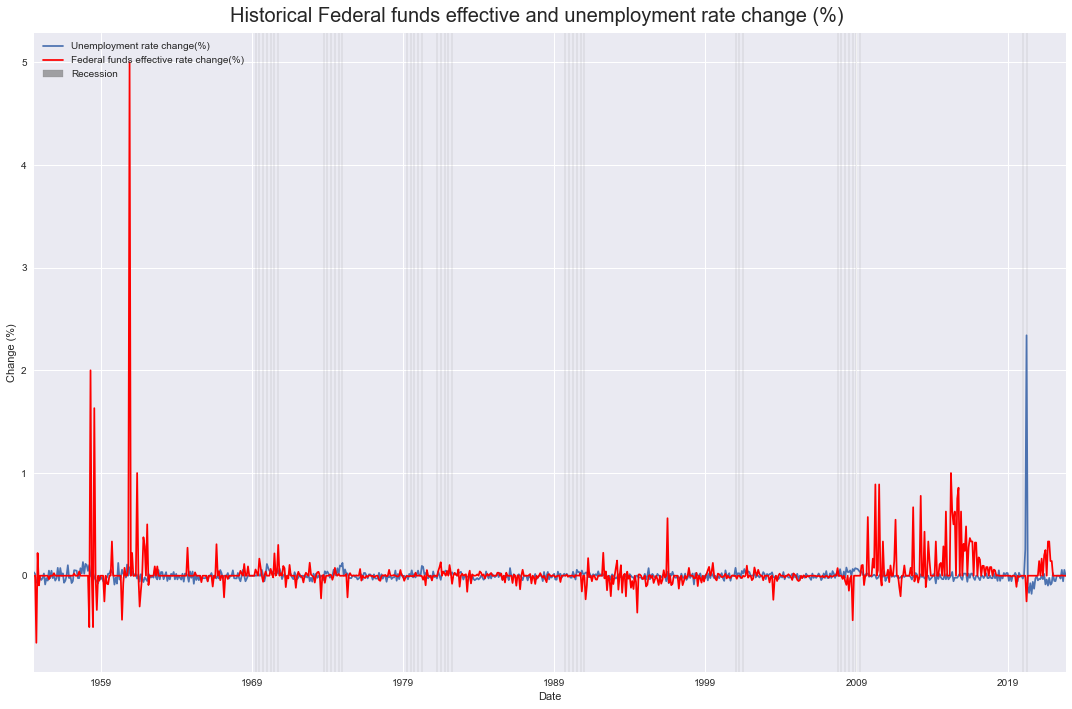

In [22]:
fig, ax = plt.subplots()
merged.plot.line(ax = ax, figsize=(15, 10), x = 'index', y ='unrate_change')
merged.plot.line(ax = ax, figsize=(15, 10), x = 'index',y = 'fed_funds_change', color = 'r')
for day in recs:
    plt.axvspan(day, day + dt.timedelta(days=1), color="grey", alpha=0.7)
ax.legend(loc = 2)
ax.set(xlabel='Date', ylabel='Change (%)')
ax.legend(['Unemployment rate change(%)','Federal funds effective rate change(%)','Recession'])
fig.suptitle('Historical Federal funds effective and unemployment rate change (%)', fontsize=20)
plt.tight_layout()

In [23]:
cpi = fred.get_series('CPALTT01USM657N').dropna().to_frame().reset_index().rename(columns = {0:'cpi'})

In [24]:
data = cpi['cpi'].tolist()

In [25]:
loc,scale = ss.norm.fit(data)
pdf = ss.norm.pdf(data, loc = loc,scale = scale)
cdf = ss.norm.cdf(data, loc = loc,scale = scale)

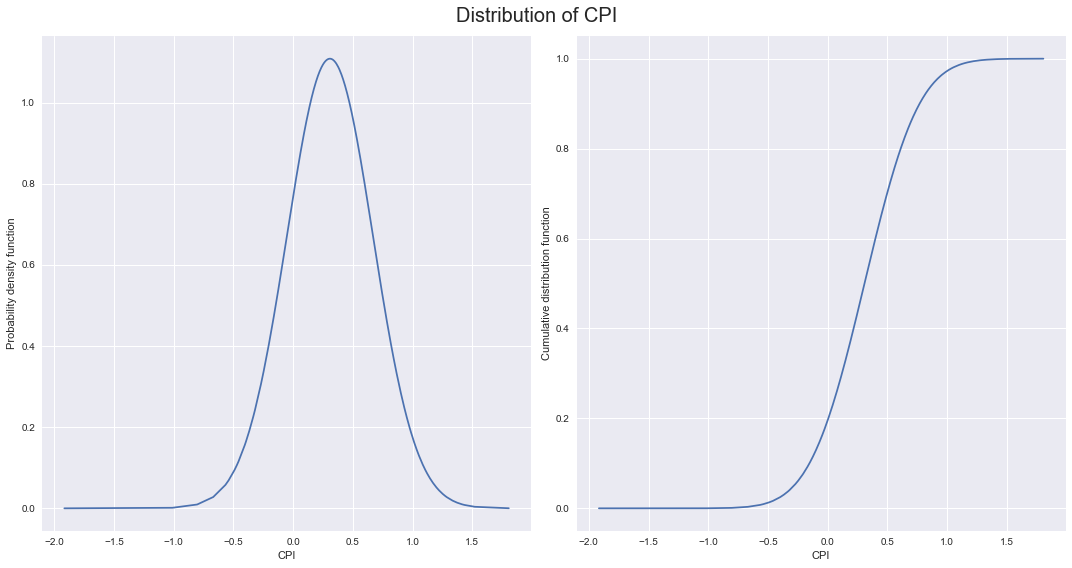

In [26]:
fig,axs = plt.subplots(ncols = 2, figsize=(15, 8))
fig.suptitle("Distribution of CPI", fontsize=20)
sns.lineplot(x = data,y = pdf,ax = axs[0]).set(xlabel = "CPI", ylabel = "Probability density function")
sns.lineplot(x = data,y = cdf,ax = axs[1]).set( xlabel = "CPI", ylabel = "Cumulative distribution function")
fig.tight_layout()

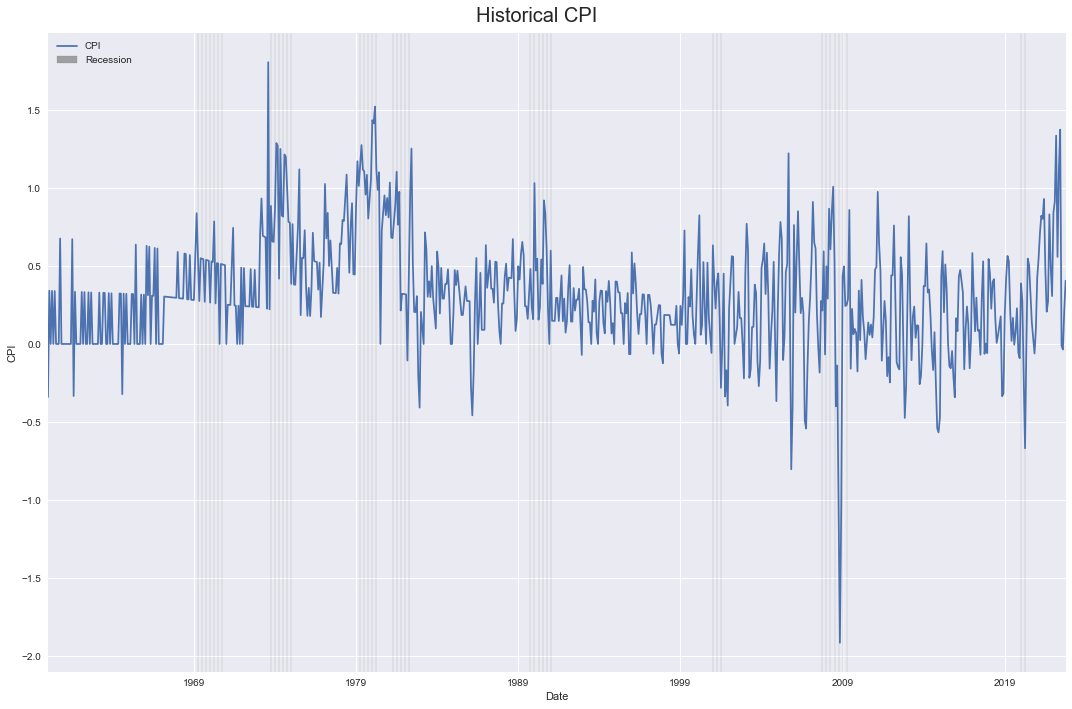

In [27]:
fig,ax = plt.subplots()
cpi.plot.line(ax = ax, figsize=(15, 10), x ='index', y ='cpi')
for i,day in enumerate(recs):
    plt.axvspan(day, day + dt.timedelta(days=1), color="grey", alpha=0.7)
ax.set(xlabel='Date', ylabel='CPI')
ax.legend(['CPI','Recession'])
fig.suptitle('Historical CPI', fontsize=20)
plt.tight_layout()

In [28]:
data = unrate.merge(cpi, on = 'index').merge(fed_funds, on = 'index')

In [29]:
result = ss.linregress(x = data['unrate'], y = data['cpi'])

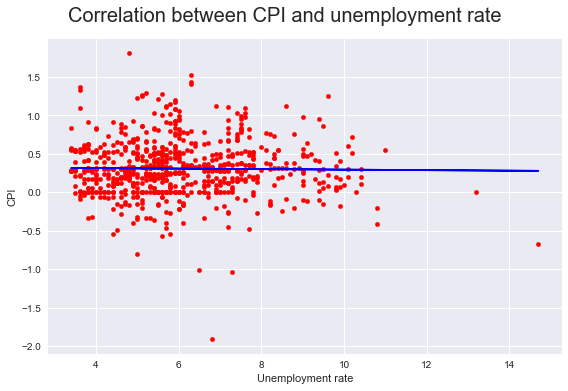

In [30]:
fig,ax = plt.subplots()
data.plot.scatter(ax = ax, x = 'unrate', y = 'cpi', color = 'r')
x = data['unrate'].to_numpy()
y = result.intercept + result.slope * x
ax.plot(x, y, color = 'b')
ax.set(xlabel='Unemployment rate', ylabel='CPI')
fig.suptitle('Correlation between CPI and unemployment rate', fontsize=20)
plt.tight_layout()

In [31]:
result = ss.linregress(x = data['unrate'], y = data['fed_funds_rate'])

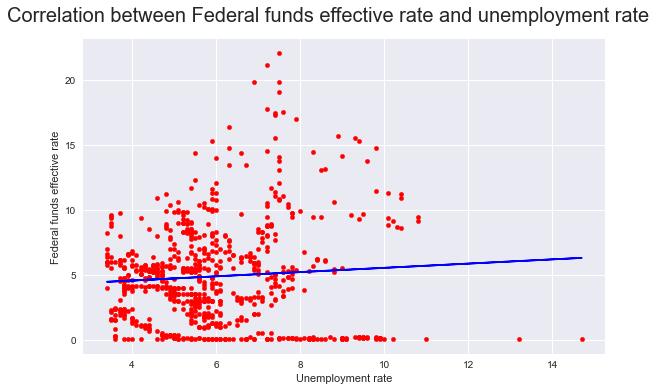

In [32]:
fig,ax = plt.subplots()
data.plot.scatter(ax = ax, x = 'unrate', y = 'fed_funds_rate', color = 'r')
x = data['unrate'].to_numpy()
y = result.intercept + result.slope * x
ax.plot(x, y, color = 'b')
ax.set(xlabel='Unemployment rate', ylabel='Federal funds effective rate')
fig.suptitle('Correlation between Federal funds effective rate and unemployment rate', fontsize=20)
plt.tight_layout()

In [33]:
result = ss.linregress(x = data['cpi'], y = data['fed_funds_rate'])

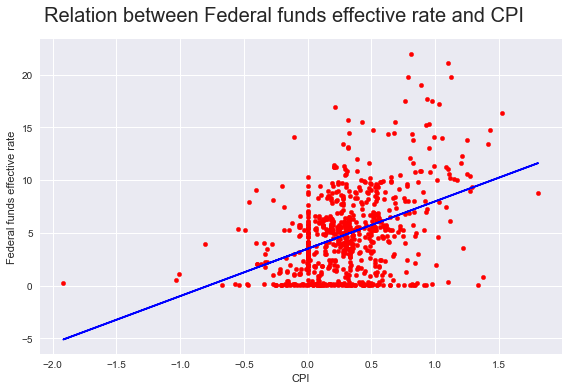

In [34]:
fig,ax = plt.subplots()
data.plot.scatter(ax = ax, x = 'cpi', y = 'fed_funds_rate', color = 'r')
x = data['cpi'].to_numpy()
y = result.intercept + result.slope * x
ax.plot(x, y, color = 'b')
ax.set(xlabel='CPI', ylabel='Federal funds effective rate')
fig.suptitle('Relation between Federal funds effective rate and CPI', fontsize=20)
plt.tight_layout()